# Onboarding Challenge

In [53]:
import os
import matplotlib
import matplotlib.pyplot as plt
from muselsl import stream, list_muses, view, record
from multiprocessing import Process
from time import strftime, gmtime
from csv import reader
from collections import OrderedDict

### Read the prerecorded file
Before doing anything with our data, we want to see what it looks like.

In [54]:
EEG_DATA_FILE_NAME = os.path.join("eeg-records", "recording-2019-09-10-02.07.53.csv")

In [55]:
eeg_data = OrderedDict()

with open(EEG_DATA_FILE_NAME, newline='') as eeg_file:
    csv_reader = reader(eeg_file, delimiter=',')
    for i, samples in enumerate(csv_reader):
        if i is  0:
            eeg_data = {key:[] for key in samples }
        else:
            for j, key in enumerate(eeg_data.keys()):
                eeg_data[key].append(float(samples[j]))

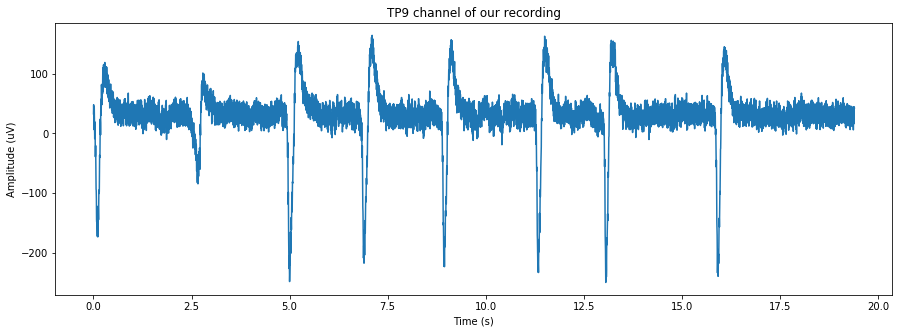

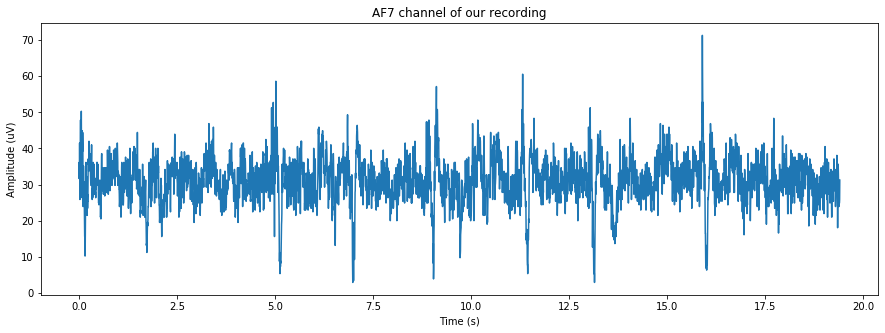

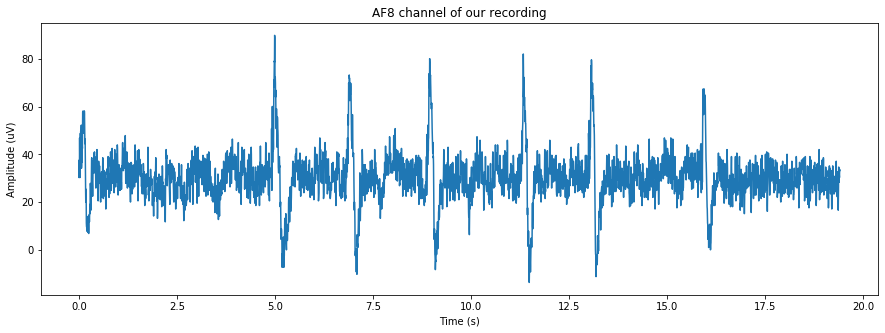

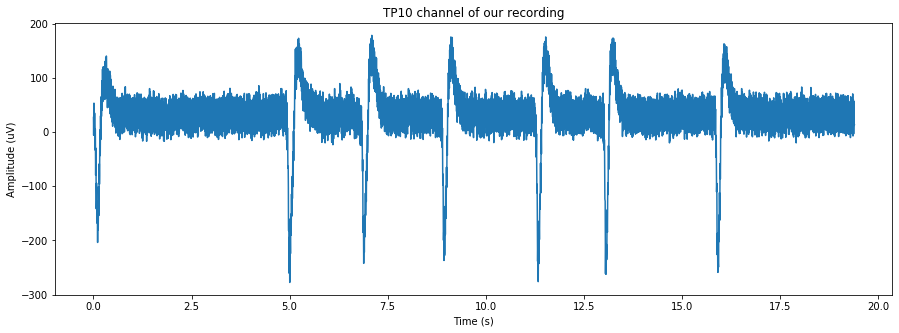

In [97]:
eeg_data['timestamps'] = [float(data) - float(eeg_data['timestamps'][0]) for data in eeg_data['timestamps']]

# Configure plot size
plt.rcParams['figure.figsize'] = [15, 5]

# Plot the TP9 channel
plt.title('TP9 channel of our recording')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.plot(eeg_data['timestamps'], eeg_data['TP9'])
plt.show()

# Plot the AF7 channel
plt.title('AF7 channel of our recording')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.plot(eeg_data['timestamps'], eeg_data['AF7'])
plt.show()

# Plot the AF8 channel
plt.title('AF8 channel of our recording')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.plot(eeg_data['timestamps'], eeg_data['AF8'])
plt.show()

# Plot the TP10 channel
plt.title('TP10 channel of our recording')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (uV)')
plt.plot(eeg_data['timestamps'], eeg_data['TP10'])
plt.show()

# We're not plotting Right Aux channel since we're not using an extra channel.

As we can see, there are some huge spikes in the data. This is caused by eyes blinking and the muscle signal propagating to the headset electrodes. The TP channels seem to have more important spikes in amplitude than the AF channels. This is caused by the fact that these last are closer to the reference electrode that cancel the blinking signal. TP spikes are negative since a high potential is detected on the ref electrode, causing the TP channel to be substracted by a high number.

# Record an EEG signal

In [ ]:
muses = list_muses()
if len(muses):
    stream_process = Process(target=stream, args=(muses[0]['address'],))
    stream_process.start()

In [ ]:
view(backend="Qt5Agg")  # Use Tk backend on Windows

In [ ]:
DURATION = 20  # secs
RECORDING_PATH = os.path.join("eeg-records", "recording-%s.csv" % strftime("%Y-%m-%d-%H.%M.%S", gmtime()))

In [ ]:
recording_process = Process(target=record, args=(DURATION, RECORDING_PATH))
recording_process.start()